## importing liabraries

In [7]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.7 MB 2.0 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/10.7 MB 2.2 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/10.7 MB 2.5 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/10.7 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/10.7 MB 3.0 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/10.7 MB 3.3 MB/s eta 0:00:02
   --------------------- ------------------ 5.8/10.7 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 6.6/10.7 MB 3.4 MB/s eta 0:00:02
   ---------------------------- ----------- 7.6/10.7 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.7 MB 3.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 3.7 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\admin\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [11]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from mpl_toolkits.mplot3d import Axes3D
 from sklearn import datasets
 from sklearn.preprocessing import StandardScaler
 from sklearn.decomposition import PCA

In [12]:
 # Step 1: Load the Iris Dataset
 iris = datasets.load_iris()
 X = iris.data  # Extracting feature matrix (4D data)
 y = iris.target  # Extracting labels

In [14]:
# Step 2: Standardizing the Data
 # PCA works best when data is standardized (mean = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Step 3: Calculating Covariance Matrix and Eigenvalues/Eigenvectors
 # The foundation of PCA is eigen decomposition of the covariance matrix
cov_matrix = np.cov(X_scaled.T)
print(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Iris dataset loaded successfully.
Data standardized using StandardScaler.


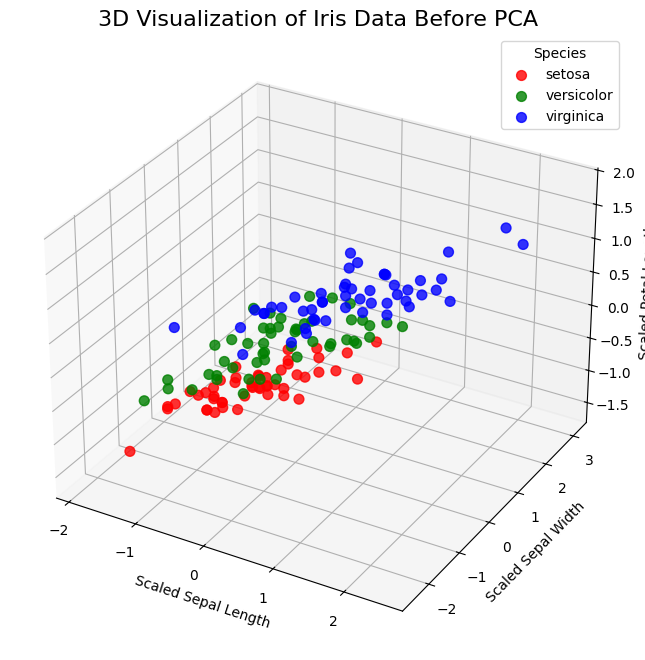


3D visualization before PCA complete.

--- Singular Value Decomposition (SVD) ---
Singular Values (S): [20.92306556 11.7091661   4.69185798  1.76273239]
Note: These values are related to the variance explained by each principal component.

PCA applied. Data reduced from 4D to 2 Principal Components.

--- Explained Variance by Principal Components ---
Explained Variance by PC1: 0.73 (73.0%)
Explained Variance by PC2: 0.23 (22.9%)
Total Explained Variance by 2 PCs: 0.96 (95.8%)


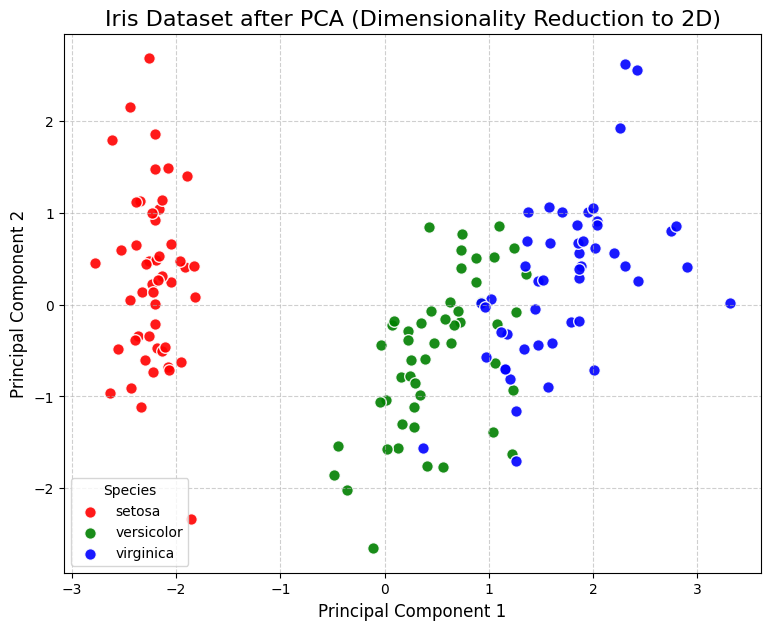


2D visualization after PCA complete.
The code execution is complete.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# --- 1. Load the Iris dataset ---
iris = datasets.load_iris()
X = iris.data  # Features (Sepal Length, Sepal Width, Petal Length, Petal Width)
y = iris.target # Target (Species: 0=setosa, 1=versicolor, 2=virginica)

print("Iris dataset loaded successfully.")

# --- 2. Standardize the data ---
# It's crucial to scale the data before applying PCA,
# as PCA is sensitive to the scale of features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardized using StandardScaler.")

# --- 3. (Optional) Initial Data Exploration and Info ---
# You can add more exploration here if needed, e.g.,
# print(pd.DataFrame(X, columns=iris.feature_names).head())
# print(pd.DataFrame(X_scaled, columns=iris.feature_names).head())


# --- 4. Visualizing Data in 3D before PCA ---
# We visualize the first three features (Sepal Length, Sepal Width, Petal Length)
# in 3D to get an initial understanding of the data distribution.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
labels = iris.target_names # e.g., ['setosa', 'versicolor', 'virginica']

for i in range(len(colors)):
    ax.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], X_scaled[y == i, 2],
               color=colors[i], label=labels[i], s=50, alpha=0.8) # Added s for size, alpha for transparency

ax.set_xlabel('Scaled Sepal Length')
ax.set_ylabel('Scaled Sepal Width')
ax.set_zlabel('Scaled Petal Length')
ax.set_title('3D Visualization of Iris Data Before PCA', fontsize=16)
plt.legend(title='Species')
plt.show()

print("\n3D visualization before PCA complete.")

# --- 5. Applying PCA using SVD (Singular Value Decomposition) ---
# PCA internally relies on SVD, which decomposes a matrix into three parts: U, S, and Vt.
# This step explicitly performs SVD to show the underlying mechanism.
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)
print("\n--- Singular Value Decomposition (SVD) ---")
print("Singular Values (S):", S)
print("Note: These values are related to the variance explained by each principal component.")

# --- 6. Applying PCA to Reduce Dimensionality to 2D ---
# We reduce the 4D data to 2D for easier visualization while retaining maximum variance.
pca = PCA(n_components=2)  # We choose 2 components because we want to visualize in 2D
X_pca = pca.fit_transform(X_scaled)  # Transform data into the new principal component space

print("\nPCA applied. Data reduced from 4D to 2 Principal Components.")

# --- 7. Understanding Variance Explained ---
# PCA provides the percentage of variance retained by each principal component.
# This helps in understanding how much information is preserved after reduction.
explained_variance = pca.explained_variance_ratio_
print("\n--- Explained Variance by Principal Components ---")
print(f"Explained Variance by PC1: {explained_variance[0]:.2f} ({explained_variance[0]*100:.1f}%)")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f} ({explained_variance[1]*100:.1f}%)")
print(f"Total Explained Variance by 2 PCs: {(explained_variance[0] + explained_variance[1]):.2f} ({(explained_variance[0] + explained_variance[1])*100:.1f}%)")


# --- 8. Visualizing the Transformed Data (2D) ---
# We plot the 2D representation of the Iris dataset after PCA transformation.
# This visualization should show clearer separation of the species.
plt.figure(figsize=(9, 7))

for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=colors[i], label=labels[i], s=70, alpha=0.9, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Iris Dataset after PCA (Dimensionality Reduction to 2D)', fontsize=16)
plt.legend(title='Species', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n2D visualization after PCA complete.")
print("The code execution is complete.")

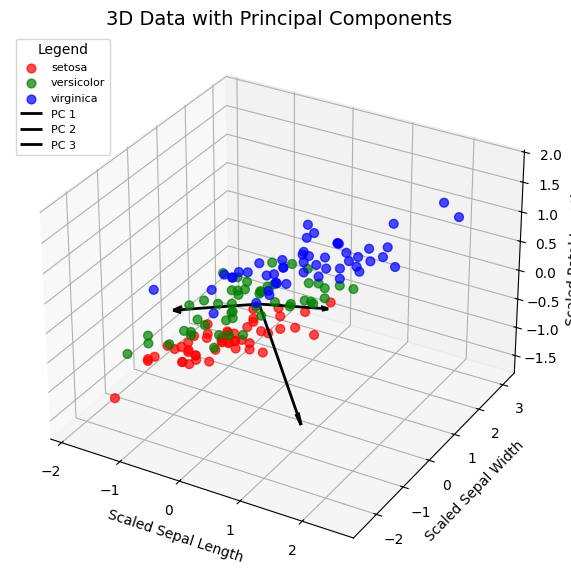

In [22]:
# Step 9: Visualizing Eigenvectors Superimposed on 3D Data (Compact Version)
fig = plt.figure(figsize=(9, 7)) # Slightly smaller figure
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D data points
for i in range(len(colors)):
    ax.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], X_scaled[y == i, 2],
               color=colors[i], label=labels[i], s=40, alpha=0.7) # Smaller points, more transparency

# Simple scale factor for eigenvectors (adjust 2.0 as needed for visibility)
# If S (singular values) is available from previous steps, use: arrow_scale = S[:3] * 2.0
arrow_scale = 2.0 # Fixed scale factor if S is not directly available or desired

# Plot first three eigenvectors
for i in range(3):
    ax.quiver(0, 0, 0, # Start point (mean of scaled data)
              eigenvectors[i, 0] * arrow_scale, # X component, scaled
              eigenvectors[i, 1] * arrow_scale, # Y component, scaled
              eigenvectors[i, 2] * arrow_scale, # Z component, scaled
              color='k', linewidth=2, arrow_length_ratio=0.1, label=f'PC {i+1}') # Black, thicker line

ax.set_xlabel('Scaled Sepal Length')
ax.set_ylabel('Scaled Sepal Width')
ax.set_zlabel('Scaled Petal Length')
ax.set_title('3D Data with Principal Components', fontsize=14) # Shorter title

ax.legend(title='Legend', loc='upper left', fontsize=8) # Smaller legend font
plt.show()